In [161]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import torch
%matplotlib inline

In [162]:
def func(x):
    return np.sin((np.pi/(x.max()-x.min()))*x)+0.6*x

In [163]:
def add_random_points(x, y, rand_num):
    """
    从原始数据中随机选择 n 个点，并将它们的 y 值替换为在原始数据的 y 最大值和最小值之间的随机数
    
    参数：
        x: 原始数据的 x 值
        y: 原始数据的 y 值
        rand_num: 要随机选择的点的数量
    
    返回值：
        新的 x 和 y 值，包含了随机选择的点
    """
    # 随机选择 n 个点的索引
    random_indices = np.random.choice(len(x), rand_num, replace=False)
    
    # 获取原始数据的 y 最大值和最小值
    y_max = np.max(y)
    y_min = np.min(y)
    
    # 将这些点的 y 值替换为在最大值和最小值之间的随机数
    new_y = y.copy()
    for index in random_indices:
        y[index] = np.random.uniform(y_min, y_max)  # 生成在 y 最大值和最小值之间的随机数
    
    return x, y

# 示例用法
rand_num = 0
real_num = 100
x = np.linspace(-3, 3, real_num)
# y= np.sin(2 * np.pi * x)  # 这里用 sin 函数作为示例原始数据
y=func(x)
# x_points = np.linspace(0, 1, 1000)
y = [np.random.normal(0, 0.01) + y1 for y1 in y]

# 添加随机点
new_x, new_y = add_random_points(x, y, rand_num)
new_x=np.reshape(new_x,(-1,1))
new_y=np.reshape(new_y,(-1,1))



In [164]:
# 目标函数
def real_func(x):
    return np.sin(2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [165]:
# #随机点的个数
# rand_num=10
# real_num=20
# # 三十个点
# x = np.linspace(0, 1, real_num)
# x_points = np.linspace(0, 1, 1000)
# # 加上正态分布噪音的目标函数的值
# y_ = real_func(x[:real_num])
# y = [np.random.normal(0, 0.1) + y1 for y1 in y_]
# y_max=np.max(np.array(y))
# y_min=np.min(np.array(y))
# # 10个随机点
# y__=np.random.uniform(int(y_min),int(y_max),rand_num)
# y=np.append(y,y__)
# print(y)


def fitting(x,y,M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(new_x,new_y,label='noise')
    plt.plot(new_x, fit_func(p_lsq[0], new_x), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq
def fitting_func(x_,y_,M):
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x_, y_))
    print('Fitting Parameters:', p_lsq[0])
    return p_lsq
    

Fitting Parameters: [ 7.91426342e-06 -2.04595539e-02 -4.67572986e-04  1.11521831e+00
 -1.41111484e-03]


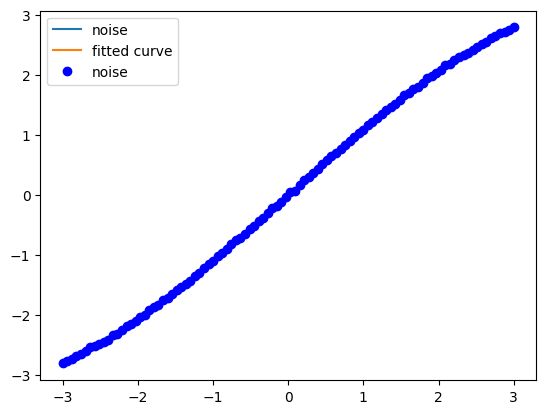

In [166]:
# M=3
p_lsq_3 = fitting(new_x.copy().reshape(-1),new_y.copy().reshape(-1),M=4)

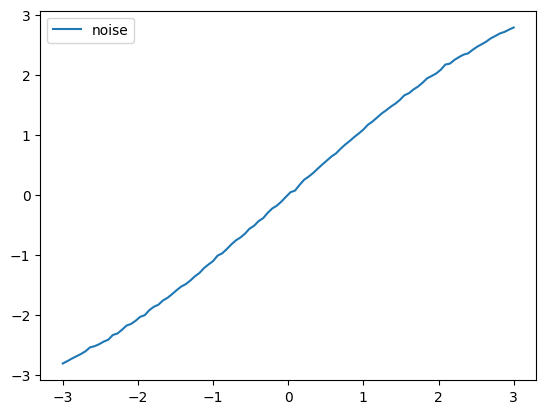

In [167]:
plt.plot(new_x,new_y,label='noise')
plt.legend()

In [168]:
# def loss(y,y_label):
#     return 0.5*np.sum(np.square(y_label-y))
# # loss(np.array([1]),np.array([3]))

In [169]:
k =5
def wrap_x(x):
    l = []
    for i in range(int(x.shape[0])):
        l.append([])
    for j in range(int(x.shape[0])):
        for i in range(k):
            l[j].append(x[j]**(i))
    # print(l)
    return np.array(l).reshape(-1,k)


# 设置阈值让它自动在合适的位置停止迭代并完成求导的部分

In [170]:
warn=3
warn_count=0
loss=[]
lamda=100
def calc_gradient(A,X,Y_LABEL):
    global warn_count
    # print(A.shape,X.shape,Y_LABEL.shape)
    temp=np.matmul(A,X)-Y_LABEL
    # print("loss:",0.5*np.sum(np.square(temp)))
    loss.append(0.5*np.sum(np.square(temp)))
    if(loss[len(loss)-1]>loss[len(loss)-2]):
        warn_count=warn_count+1
    else:
        warn_count=warn_count-1
        if(warn_count<0):
            warn_count=0
    return np.matmul(np.transpose(A),temp)+lamda*X
loop=10000
step=0.001
x=np.random.rand(k,1)
# x=np.zeros_like(x)
x_copy=x.copy()
print("x_init:",x)
A=wrap_x(new_x)
for i in range(loop):
    if(warn_count>warn):
        print("break at:",i)
        break
    temp=calc_gradient(A,x,new_y)
    temp=temp/np.median(temp)
    # print(temp)
    x=x-temp*step
print("X",x)

x_init: [[0.22939813]
 [0.42477429]
 [0.49512537]
 [0.72997376]
 [0.86516343]]
break at: 172
X [[ 0.19252012]
 [ 0.32646811]
 [ 0.33726356]
 [ 0.07495584]
 [-0.05156034]]


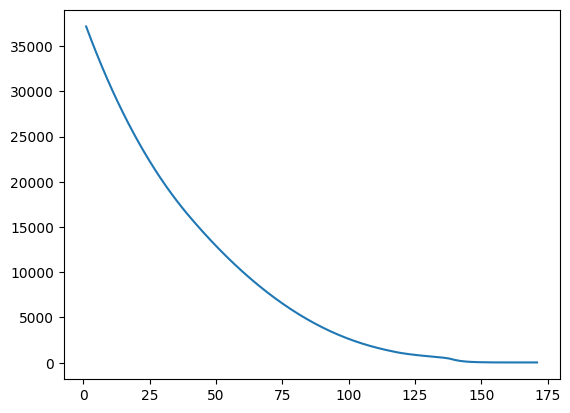

In [171]:
xx=[]
for i in range(loop):
    xx.append(i+1)
plt.plot(xx[0:len(loss)-1],loss[0:len(loss)-1],label="loss")

(100, 1) (100, 1)


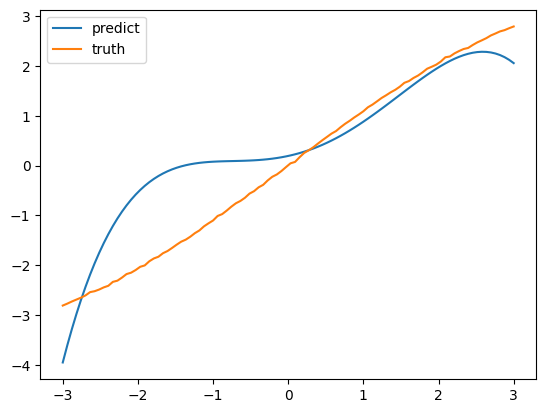

In [172]:
y=np.matmul(A,x)
print(new_x.shape,y.shape)
# print(new_y)
plt.plot(new_x.reshape(-1),y.reshape(-1),label="predict")
plt.plot(new_x.reshape(-1),new_y.reshape(-1),label="truth")
plt.legend()

In [173]:
torch_x=torch.from_numpy(new_x)
torch_y=torch.from_numpy(new_y)
torch_A=torch.from_numpy(A)
torch_w=torch.from_numpy(x_copy)
torch_w=torch.autograd.Variable(torch_w,requires_grad=True)
torch_A=torch.autograd.Variable(torch_A,requires_grad=True)
torch_y=torch.autograd.Variable(torch_y,requires_grad=True)
# temp=torch.matmul(torch_A,torch_w)-torch_y
# print(temp.shape)
# z=0.5*torch.matmul(temp.transpose(-1,-2),temp)
# z.backward()
# # z.backward()
# print(torch_w.grad)
# for i in range(loop):
#     temp=torch.matmul(torch_A,torch_w)-torch_y
#     z=0.5*torch.matmul(temp.transpose(-1,-2),temp)
#     z.backward()
#     print(torch_w.grad)
#     torch_w=torch_w-torch_w.grad*torch.tensor([step])/torch.median(torch_w.grad)

In [174]:
from torch import nn, optim
class Net(nn.Module):
    def __init__(self,A,W,B):
        super().__init__()
        self.A = nn.Parameter(A)
        self.W = nn.Parameter(W)
        self.B=nn.Parameter(B)

    def forward(self):
        temp=torch.matmul(torch_A,torch_w)-torch_y
        z=0.5*torch.matmul(temp.transpose(-1,-2),temp)
        return z
model=Net(torch_A,torch_w,torch_y)
print(model.W)
optimizer = optim.SGD(model.parameters(), lr=step)

Parameter containing:
tensor([[0.2294],
        [0.4248],
        [0.4951],
        [0.7300],
        [0.8652]], dtype=torch.float64, requires_grad=True)


In [175]:
for i in range(loop):
    optimizer.zero_grad()
    loss=model.forward()
    loss.backward()
    optimizer.step()

(100, 5)
(100, 1) (100, 1)


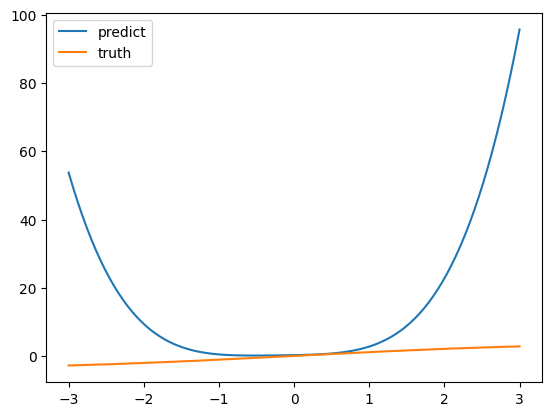

In [176]:
temp=model.W
np_w=np.array(temp.tolist())
print(A.shape)
y=np.matmul(A,np_w)
print(new_x.shape,y.shape)
# print(new_y)
plt.plot(new_x.reshape(-1),y.reshape(-1),label="predict")
plt.plot(new_x.reshape(-1),new_y.reshape(-1),label="truth")
plt.legend()

# 牛顿法

In [177]:
w_newton=x_copy.copy()
la=0.1
Hessian=np.matrix(np.matmul(A.transpose(),A))+la*np.eye(k)
First_derivative=np.matrix(np.matmul(Hessian,w_newton)-np.matmul(A.transpose(),new_y))
time=5
for i in range(time):
    w_newton=w_newton-np.matmul(Hessian.I,First_derivative)
    First_derivative=np.matrix(np.matmul(Hessian,w_newton)-np.matmul(A.transpose(),new_y))

(100, 5)
(100, 1) (100, 1)


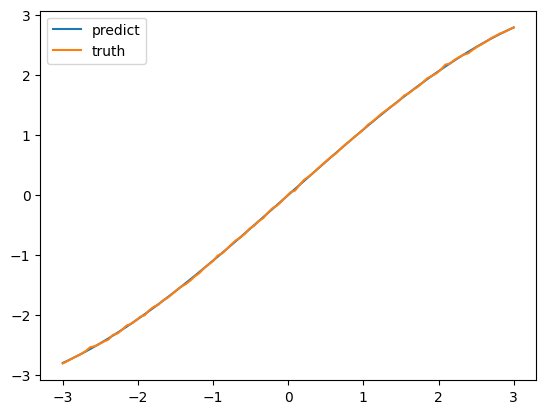

In [178]:
np_w=w_newton
print(A.shape)
y=np.matmul(A,np_w)
print(new_x.shape,y.shape)
# print(new_y)
plt.plot(new_x,y,label="predict")
plt.plot(new_x.reshape(-1),new_y.reshape(-1),label="truth")
plt.legend()